### Check for the execustion time for this notebook in bottom of the page
#### 2078.7129650115967 seconds approx

In [1]:
# import and start time
import time
start_time = time.time()

## Views about the problem statement
The problem statement involves developing a machine learning model to predict fraudulent transactions for a financial company and using insights from the model to create an actionable plan. This is a binary classification problem with "isFraud" as the target column, using the provided "Fraud" dataframe. 

The dataset includes the following columns: step, type, amount, nameOrig, oldbalanceOrg, newbalanceOrig, nameDest, oldbalanceDest, newbalanceDest, isFraud, and isFlaggedFraud. The target variable "isFraud" is a binary categorical variable, which means we need to predict whether a transaction is "Fraudulent" (1) or "Non-Fraudulent" (0).

## My approaches to solving this task
### Q1. Data cleaning including missing values, outliers and multi-collinearity.
- **1.1 Data Understanding and Tidying:-** First, to understand the given dataframe "isFraud" which contain financial datas.

- **1.2 Data Cleaning and Preprocessing:-** Perform the EDD (Extended Data Dictionary) process to check for missing values and Explore relationships between features and the target variable. As target variable is categorical so best preferal plot to cehck for outliers is box-plot and count-plots to identify the number for categories.

### Q3. How did you select variables to be included in the model?
- **3.1 Exploratory Data Analysis (EDA):-** EDD treatment for missing values and outliers, if required and also to create dummies values for categorical variables.

- **3.2 Splitting of datas for training model:-** splitting into dependent and independent variables, and fruthur into train-test datasets. 

### Q2. Describe your fraud detection model in elaboration.
- **2.1 Model Selection:-** As the problem involves predicting a categorical target variable, selecting models such as Logistic Regression, Linear Discriminant Analysis, and K-Nearest Neighbors is suitable.

- **2.2 Ensemble methods:-** Ensemble methods as-Bagging, Random Forest classification, Gradient Boosting, AdaBoost, and XGBoost can handle both categorical and continuous target variables. Therefore, I will also use these above mentioned models to train and predict the "isFraud" for upcoming days.

### Q4. Demonstrate the performance of the model by using best set of tools.
- **4.1 Model Evaluation:-** After training with the selected model, check for performance evaluation metrics like Mean Squared Error (MSE), Mean Absolute Error (MAE), confusion matrix, accuracy_score, and check for the overfitting, and will select the best-performing model among them.

- **4.2 Prediction and conclusion:-** Based on the above step will find the best-fit model for the problem statement and also conclude with the accuracy of model fitting.

### 1.1 Data Understanding and Tidying
##### 1.1.1 Importing Numpy, Pandas, Seaborn, and matplot libraries for data intrepretation and visualization

In [2]:
import numpy as np     # Importing Numpy library 
import pandas as pd    # Importing Pandas library 
import seaborn as sns  # Importing Seaborn library 
import matplotlib.pyplot as plt  # Importing Matplot library 

##### 1.1.2 Loading and printing Fraud prediction dataframe using pandas library

In [3]:
# Loading and printing Fraud dataset excel file
Fraud = pd.read_csv('C:/Users/Zoom/Desktop/Fraud.csv', header=0)
print(("\033[1m Fraud \033[0m"), "\n", Fraud, "\n")

 Fraud  
          step      type      amount     nameOrig  oldbalanceOrg  \
0           1   PAYMENT     9839.64  C1231006815      170136.00   
1           1   PAYMENT     1864.28  C1666544295       21249.00   
2           1  TRANSFER      181.00  C1305486145         181.00   
3           1  CASH_OUT      181.00   C840083671         181.00   
4           1   PAYMENT    11668.14  C2048537720       41554.00   
...       ...       ...         ...          ...            ...   
6362615   743  CASH_OUT   339682.13   C786484425      339682.13   
6362616   743  TRANSFER  6311409.28  C1529008245     6311409.28   
6362617   743  CASH_OUT  6311409.28  C1162922333     6311409.28   
6362618   743  TRANSFER   850002.52  C1685995037      850002.52   
6362619   743  CASH_OUT   850002.52  C1280323807      850002.52   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
0             160296.36  M1979787155            0.00            0.00        0   
1              19384.72

### 1.2 Data Cleaning and Preprocessing
##### 1.2.1 EDD (Extended Data Dictionary) process to check for missing values

In [4]:
# To get the information about the "Fraud" dataframe, including data types, non-null counts, and memory usage
Fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
# Check for missing values
missing_values = Fraud.isnull().sum()

# Display missing values counts
print("Missing Values Counts:")
print(missing_values)

Missing Values Counts:
step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [6]:
# To get the descriptive statistics of the "Fraud" numeric columns
Fraud.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


##### 1.2.2  By using box-plot we can able to check for outliers for continous variables

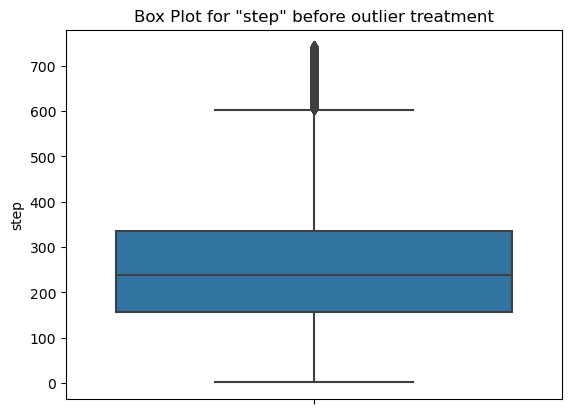

In [7]:
# To visualize the distribution of 'step' in the "Fraud" dataset and also to check for the outliers
sns.boxplot(y='step', data=Fraud)
plt.title('Box Plot for "step" before outlier treatment')
plt.show()

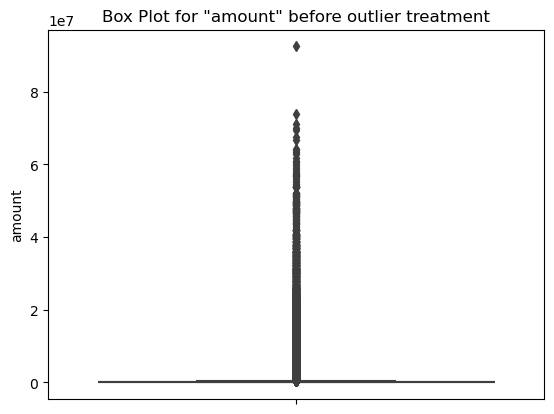

In [8]:
# To visualize the distribution of 'amount' in the "Fraud" dataset and also to check for the outliers
sns.boxplot(y='amount', data=Fraud)
plt.title('Box Plot for "amount" before outlier treatment')
plt.show()

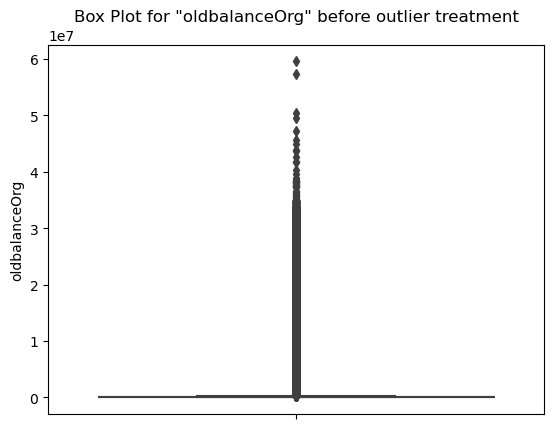

In [9]:
# To visualize the distribution of 'oldbalanceOrg' in the "Fraud" dataset and also to check for the outliers
sns.boxplot(y='oldbalanceOrg', data=Fraud)
plt.title('Box Plot for "oldbalanceOrg" before outlier treatment')
plt.show()

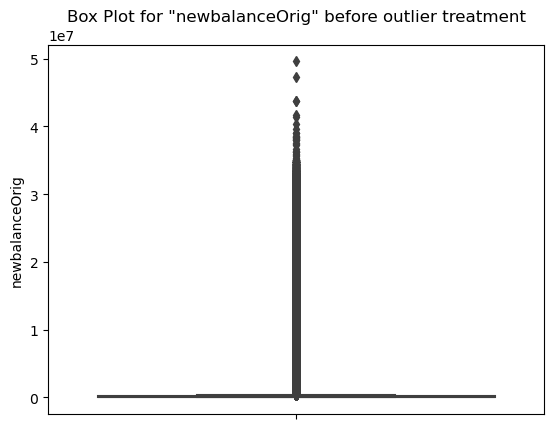

In [10]:
# To visualize the distribution of 'newbalanceOrig' in the "Fraud" dataset and also to check for the outliers
sns.boxplot(y='newbalanceOrig', data=Fraud)
plt.title('Box Plot for "newbalanceOrig" before outlier treatment')
plt.show()

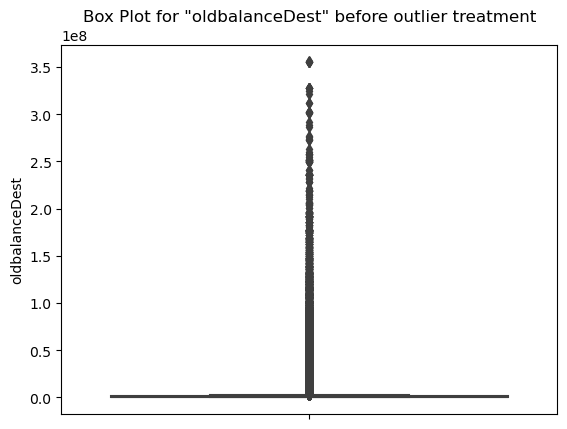

In [11]:
# To visualize the distribution of 'oldbalanceDest' in the "Fraud" dataset and also to check for the outliers
sns.boxplot(y='oldbalanceDest', data=Fraud)
plt.title('Box Plot for "oldbalanceDest" before outlier treatment')
plt.show()

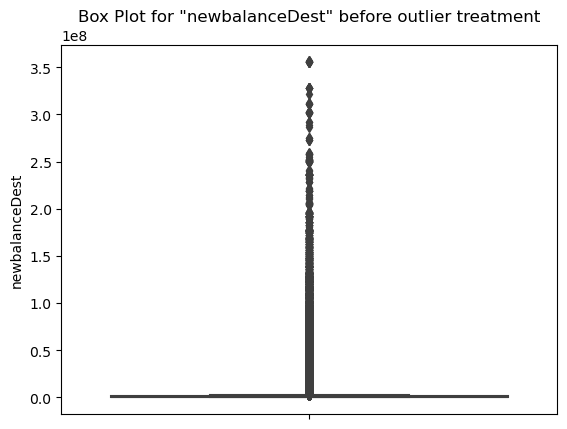

In [12]:
# To visualize the distribution of 'newbalanceDest' in the "Fraud" dataset and also to check for the outliers
sns.boxplot(y='newbalanceDest', data=Fraud)
plt.title('Box Plot for "newbalanceDest" before outlier treatment')
plt.show()

##### 1.2.3 Count-plot to analyse the total counts of categorical varaibles in  "Fraud" dataframe

<Axes: xlabel='type', ylabel='count'>

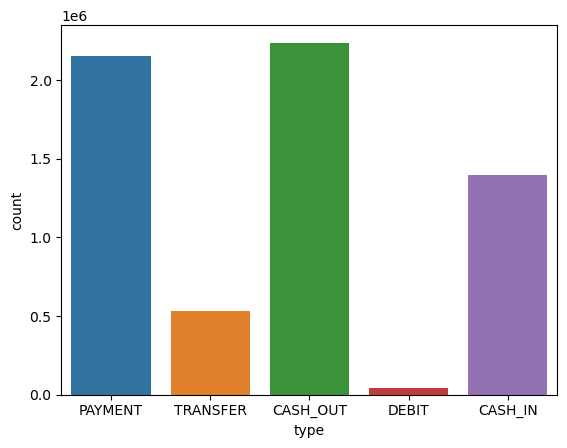

In [13]:
# To check the counts of observations in each categorical "type" bins using bar graph
sns.countplot(x='type', data = Fraud)

In [14]:
# Count the observations in each 'isFraud' bin
isFraud_counts = Fraud['isFraud'].value_counts()

# Display the counts
print(isFraud_counts)

isFraud
0    6354407
1       8213
Name: count, dtype: int64


In [15]:
# Count the observations in each 'isFlaggedFraud' bin
isFlaggedFraud_counts = Fraud['isFlaggedFraud'].value_counts()

# Display the counts
print(isFlaggedFraud_counts)

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64


### Observations after EDD on provided dataset
##### For the missing value obsevation for different columns
&rightarrow; There are No missing values in any of the columns of Fraud dataset, so no missing value treatment is required.

##### For the outliers in varaiable, box-plots gives proper visualizatuions
&rightarrow; There are outliers showing in "step", "amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", newbalanceDest".

- **Note 1: For the 'step' column, as it represents days over a particular duration, but for avoiding overfitting otlier treatment is required.**

- **Note 2: For the 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', and 'newbalanceDest' columns, as they represent balances (money), they can anything depending on the customers. But for avoiding overfitting will do outliers treatment.**

##### For the count of categorical datas, count-plots gives proper visualizatuions
&rightarrow; "PAYMENT" and "CASH_OUT" types are more and "DEBIT" is very less in compare to others types.

&rightarrow; There are "6354407" instances where 'isFraud' is False and "8213" instances where 'isFraud' is True.

&rightarrow; There are "6362604" instances where 'isFraud' is False and "16" instances where 'isFraud' is True."

##### "nameOrig", and "nameDest" columns contain UCI
&rightarrow; "nameOrig", and "nameDest" are contains the unique customer identifier.

### 3.1 Exploratory Data Analysis (EDA)
#### 3.1.1 Outliers treatement by using box-plot.

Lower Bound: -112.5, Upper Bound: 603.5


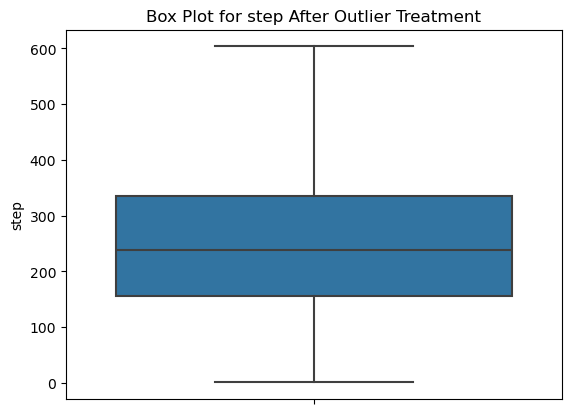

In [16]:
# define function for outlier treatment using box-plot concept
def treat_outliers(data, column):

    # Calculate Q1 (25th-percentile) and Q3 (75th-percentile)
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)

    # Calculate IQR
    IQR = Q3-Q1

    # Define the bounds for identifying outliers with standard threshold=1.5
    lower_bound = Q1-1.5*IQR
    upper_bound = Q3+1.5*IQR
    # print lower bound and upper bound
    print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

    # Cap the outliers
    data[column] = data[column].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))
    return data

# Treat outliers in "step" column
Fraud = treat_outliers(Fraud, 'step')

# Verify the outlier treatments for "step" 
sns.boxplot(y='step', data=Fraud)  
plt.title('Box Plot for step After Outlier Treatment')
plt.show()

Lower Bound: -279608.29125, Upper Bound: 501719.33875


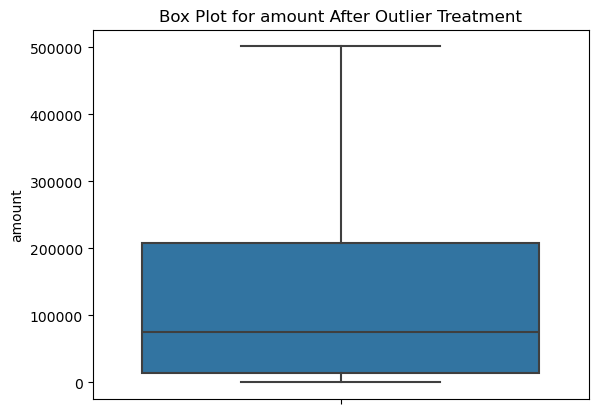

In [17]:
# Treat outliers in "amount" column
Fraud = treat_outliers(Fraud, 'amount')

# Verify the outlier treatments for "amount" 
sns.boxplot(y='amount', data=Fraud)  
plt.title('Box Plot for amount After Outlier Treatment')
plt.show()

Lower Bound: -160972.7625, Upper Bound: 268287.9375


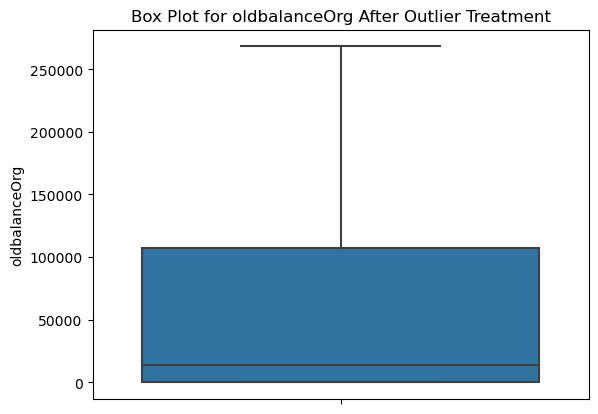

In [18]:
# Treat outliers in "oldbalanceOrg" column
Fraud = treat_outliers(Fraud, 'oldbalanceOrg')

# Verify the outlier treatments for "oldbalanceOrg" 
sns.boxplot(y='oldbalanceOrg', data=Fraud)  
plt.title('Box Plot for oldbalanceOrg After Outlier Treatment')
plt.show()

Lower Bound: -216387.615, Upper Bound: 360646.025


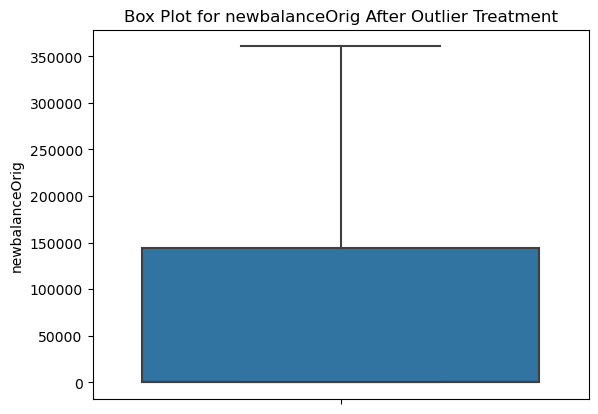

In [19]:
# Treat outliers in "newbalanceOrig" column
Fraud = treat_outliers(Fraud, 'newbalanceOrig')

# Verify the outlier treatments for "newbalanceOrig" 
sns.boxplot(y='newbalanceOrig', data=Fraud)  
plt.title('Box Plot for newbalanceOrig After Outlier Treatment')
plt.show()

Lower Bound: -1414555.06125, Upper Bound: 2357591.76875


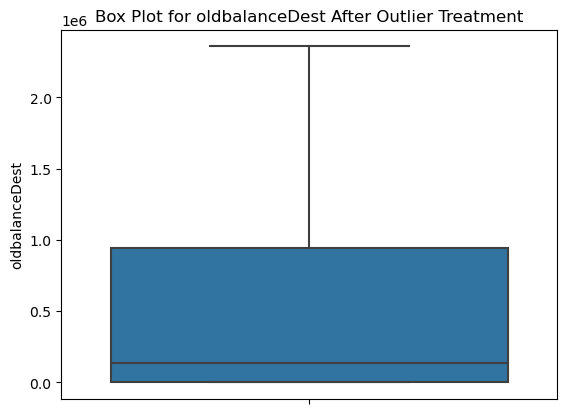

In [20]:
# Treat outliers in "oldbalanceDest" column
Fraud = treat_outliers(Fraud, 'oldbalanceDest')

# Verify the outlier treatments for "oldbalanceDest" 
sns.boxplot(y='oldbalanceDest', data=Fraud)  
plt.title('Box Plot for oldbalanceDest After Outlier Treatment')
plt.show()

Lower Bound: -1667863.875, Upper Bound: 2779773.125


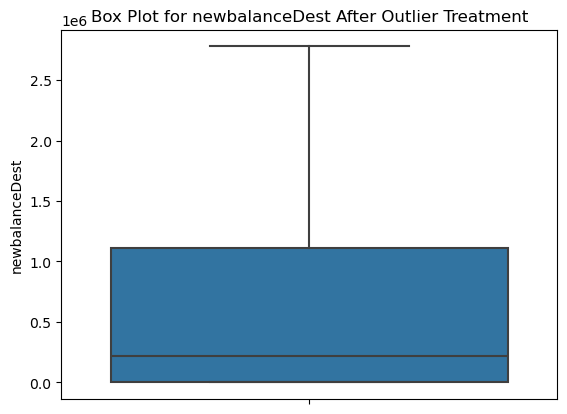

In [21]:
# Treat outliers in "newbalanceDest" column
Fraud = treat_outliers(Fraud, 'newbalanceDest')

# Verify the outlier treatments for "newbalanceDest" 
sns.boxplot(y='newbalanceDest', data=Fraud)  
plt.title('Box Plot for newbalanceDest After Outlier Treatment')
plt.show()

##### 3.1.2 Deleting  "nameOrig", and "nameDest" columns as it contains unique customer identifier.

In [22]:
# Delete the 'nameOrig' column from the 'Fraud' dataframe
del Fraud["nameOrig"]

In [23]:
# Delete the 'nameDest' column from the 'Fraud' dataframe
del Fraud["nameDest"]

##### 3.1.3 Creating dummies values for categorical variables

In [24]:
# converts the categorical variables in the DataFrame "Fraud" into dummy variables and convert it into float data type
Fraud = pd.get_dummies(Fraud, columns=["type", "isFraud", "isFlaggedFraud"], drop_first=True).astype(float)

In [25]:
# To get the information about the "Fraud" dataframe, including data types, and memory usage after creating dummies value
Fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 12 columns):
 #   Column            Dtype  
---  ------            -----  
 0   step              float64
 1   amount            float64
 2   oldbalanceOrg     float64
 3   newbalanceOrig    float64
 4   oldbalanceDest    float64
 5   newbalanceDest    float64
 6   type_CASH_OUT     float64
 7   type_DEBIT        float64
 8   type_PAYMENT      float64
 9   type_TRANSFER     float64
 10  isFraud_1         float64
 11  isFlaggedFraud_1  float64
dtypes: float64(12)
memory usage: 582.5 MB


In [26]:
# To display the first few rows of  "Fraud" dataframe to check for the created dummies variables
Fraud.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,isFraud_1,isFlaggedFraud_1
0,1.0,9839.64,170136.0,160296.36,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,1864.28,21249.0,19384.72,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,181.00,181.0,0.00,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,1.0,181.00,181.0,0.00,21182.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1.0,11668.14,41554.0,29885.86,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [27]:
# To get the multi-collinearity between variables
Fraud.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,isFraud_1,isFlaggedFraud_1
step,1.000000,-0.006764,-0.013727,-0.013608,0.001201,-0.005468,-0.012817,0.002744,0.005072,0.006661,0.029138,0.002900
amount,-0.006764,1.000000,0.023468,0.050487,0.412529,0.497708,0.201246,-0.070191,-0.582672,0.477567,0.048094,0.003837
oldbalanceOrg,-0.013727,0.023468,1.000000,0.858632,0.105036,0.038118,-0.271138,-0.013722,-0.145024,-0.116704,0.045966,0.003036
newbalanceOrig,-0.013608,0.050487,0.858632,1.000000,0.120676,0.016830,-0.395134,-0.018881,-0.194133,-0.180455,-0.021092,0.003090
oldbalanceDest,0.001201,0.412529,0.105036,0.120676,1.000000,0.966351,0.220451,0.020944,-0.512740,0.206996,-0.013570,-0.001138
newbalanceDest,-0.005468,0.497708,0.038118,0.016830,0.966351,1.000000,0.271340,0.014744,-0.528337,0.306022,-0.001172,-0.001172
type_CASH_OUT,-0.012817,0.201246,-0.271138,-0.395134,0.220451,0.271340,1.000000,-0.059625,-0.526422,-0.222672,0.011256,-0.001168
type_DEBIT,0.002744,-0.070191,-0.013722,-0.018881,0.020944,0.014744,-0.059625,1.000000,-0.057868,-0.024478,-0.002911,-0.000128
type_PAYMENT,0.005072,-0.582672,-0.145024,-0.194133,-0.512740,-0.528337,-0.526422,-0.057868,1.000000,-0.216110,-0.025697,-0.001133
type_TRANSFER,0.006661,0.477567,-0.116704,-0.180455,0.206996,0.306022,-0.222672,-0.024478,-0.216110,1.000000,0.053869,0.005245


##### 3.2.1 Independent and dependent (isFraud) data spliting

In [28]:
# Creating and printing "X" dataframe as independent data
X = Fraud.loc[:,Fraud.columns!="isFlaggedFraud_1"]
print(X) # print "X"

          step        amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0          1.0    9839.64000    170136.0000       160296.36    0.000000e+00   
1          1.0    1864.28000     21249.0000        19384.72    0.000000e+00   
2          1.0     181.00000       181.0000            0.00    0.000000e+00   
3          1.0     181.00000       181.0000            0.00    2.118200e+04   
4          1.0   11668.14000     41554.0000        29885.86    0.000000e+00   
...        ...           ...            ...             ...             ...   
6362615  603.5  339682.13000    268287.9375            0.00    0.000000e+00   
6362616  603.5  501719.33875    268287.9375            0.00    0.000000e+00   
6362617  603.5  501719.33875    268287.9375            0.00    6.848884e+04   
6362618  603.5  501719.33875    268287.9375            0.00    0.000000e+00   
6362619  603.5  501719.33875    268287.9375            0.00    2.357592e+06   

         newbalanceDest  type_CASH_OUT  type_DEBIT 

In [29]:
# Creating and printing "Y" dataframe as dependent data
Y = Fraud["isFlaggedFraud_1"]
print(Y) # print "Y"

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
6362615    0.0
6362616    0.0
6362617    0.0
6362618    0.0
6362619    0.0
Name: isFlaggedFraud_1, Length: 6362620, dtype: float64


##### 3.2.2 Train-test data spliting from "X" and "Y" splitted dataframes

In [30]:
# Import the "train_test_split" library
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets with (80-20%) ratio
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Print the shapes of the test, train of "X" and "Y" sets
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(5090096, 11) (1272524, 11) (5090096,) (1272524,)


### 4.1 and 4.2 steps for question-4, I will perfoem with question-2 together
## Q2. Describe your fraud detection model in elaboration.
- 2.1.1 Logistic Regression 

- 2.1.2 Linear Discriminant Analysis

#### Advance Ensemble techniques like, Bagging, Random forest Classifier, Gradient search, Ada boost, and XG Boost can handle both numerical and categorical data

- 2.2.1 Bagging

- 2.2.2 Random Forest 

- 2.2.3 Gradient Boosting

- 2.2.4 Ada boost

- 2.2.5 XG Boost

- 2.2.6 Classification Decision Tree

### 2.1.1 Logistic Regression
##### 2.1.1.1 Performing logistic regression by using sklearn model on "y_train" and "x_train" varaibles

In [31]:
# Import the LogisticRegression module from the sklearn.linear library
from sklearn.linear_model import LogisticRegression

Logistic_Reg = LogisticRegression() # Define Logistic Regression function

# Fit Logistic Regression on "x_train_scaler" and "y_train"
Logistic_Reg.fit(x_train, y_train)

LogisticRegression()

In [32]:
# Predict the target variable for the train and test dataset using the trained logistic regression model
LR_y_train_pred = Logistic_Reg.predict(x_train)
LR_y_test_pred = Logistic_Reg.predict(x_test)

##### 2.1.1.2 Performance evaluation for Logistic regression

In [33]:
# Importung mean_absolute_error, mean_squared_error, confusion_matrix, accuracy_score, from sklearn.metrics model
from sklearn.metrics import mean_absolute_error, mean_squared_error, confusion_matrix, accuracy_score 

##### 2.1.1.2.1 Calculation of MSE for train and test dataset

In [34]:
# Calculate mean squared error for training dataset of logistic regression
LR_train_mse = mean_squared_error(y_train, LR_y_train_pred)

# Print "MSE" of train dataset for Logistic regression
print(LR_train_mse)  

2.1610594377787766e-06


In [35]:
# Calculate mean squared error for testing dataset of logistic regression
LR_test_mse = mean_squared_error(y_test, LR_y_test_pred)

# Print "MSE" of test dataset for Logistic regression
print(LR_test_mse)  

3.929198977779594e-06


##### 2.1.1.2.2 Calculation of MAE for train and test dataset

In [36]:
# Calculate mean absolute error for training dataset of logistic regression
LR_train_mae = mean_absolute_error(y_train, LR_y_train_pred)

# Print "MAE" of train dataset for Logistic regression
print(LR_train_mae) 

2.1610594377787766e-06


In [37]:
# Calculate mean absolute error for testing dataset of logistic regression
LR_test_mae = mean_absolute_error(y_test, LR_y_test_pred)

# Print "MAE" of test dataset for Logistic regression
print(LR_test_mae) 

3.929198977779594e-06


##### 2.1.1.2.3 Calculation of confusion matrix for train and test dataset

In [38]:
# Confusion matrix calculation for train dataset of logistic regression
LR_train_conf_mat = confusion_matrix(y_train, LR_y_train_pred)

# Print confusion matrix of train dataset for Logistic regression
print(LR_train_conf_mat) 

[[5090085       0]
 [     11       0]]


In [39]:
# Confusion matrix calculation for test dataset of logistic regression
LR_test_conf_mat = confusion_matrix(y_test, LR_y_test_pred)

# Print confusion matrix of test dataset for Logistic regression
print(LR_test_conf_mat) 

[[1272519       0]
 [      5       0]]


##### 2.1.1.2.4 Calculation of accuracy score for train and test dataset

In [40]:
# accuracy_score calculation for the train dataset's for actual values (y_train) and predicted values (LR_y_train_pred)
LR_train_acc_score = accuracy_score(y_train, LR_y_train_pred)

## Print accuracy_score of train dataset for logistic regression
print(LR_train_acc_score)

0.9999978389405623


In [41]:
# accuracy_score calculation for the test dataset's for actual values (y_test) and predicted values (LR_y_test_pred)
LR_test_acc_score = accuracy_score(y_test, LR_y_test_pred)

## Print accuracy_score of test dataset for logistic regression
print(LR_test_acc_score)

0.9999960708010223


##### 2.1.1.2.5 Checking for overfitting and underfitting

In [42]:
# Check for overfitting
if LR_train_acc_score > LR_test_acc_score + 0.15:  # Example threshold for overfitting
    print("The 'Logistic Regression' trained model is overfitting.")
elif LR_train_acc_score < LR_test_acc_score - 0.15:  # Example threshold for underfitting
    print("The 'Logistic Regression' trained model is underfitting.")
else:
    print("The 'Logistic Regression' trained model is Well-fitted.")

The 'Logistic Regression' trained model is Well-fitted.


### 2.1.2 Linear Discriminant Analysis (LDA)
##### 2.1.2.1 Performing Linear Discriminant Analysis by using sklearn model on "y_train" and "x_train" varaibles 

In [43]:
# Import the StandardScaler class from the sklearn.preprocessing module
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object and fit it to the training data
scaler = StandardScaler().fit(x_train)

x_train_scaler = scaler.transform(x_train) # Transform the training data using the fitted scaler to standardize it
x_test_scaler = scaler.transform(x_test)   # Transform the test data using the same fitted scaler to standardize it

In [44]:
# Import the Linear Discriminant Analysis Ridge regression model from the sklearn.linear_model module
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Create a Linear Discriminant Analysis model
LDA_clf = LinearDiscriminantAnalysis()

# Fit the Linear Discriminant Analysis model to the (x_train_scaler) and (y_train) values
LDA_clf.fit(x_train_scaler, y_train)

LinearDiscriminantAnalysis()

In [45]:
# Predict the target variable for the train and test dataset for Linear Discriminant Analysis model
LDA_y_train_pred = LDA_clf.predict(x_train_scaler)
LDA_y_test_pred = LDA_clf.predict(x_test_scaler)

##### 2.1.2.2 Performance evaluation for Linear Discriminant Analysis
##### 2.1.2.2.1 Calculation of MSE for train and test dataset 

In [46]:
# Calculate mean squared error for training dataset of Linear Discriminant Analysis
LDA_train_mse = mean_squared_error(y_train, LDA_y_train_pred)

# Print "MSE" of train dataset for Linear Discriminant Analysis
print(LDA_train_mse) 

0.0012889737246605958


In [47]:
# Calculate mean squared error for testing dataset of Linear Discriminant Analysis
LDA_test_mse = mean_squared_error(y_test, LDA_y_test_pred)

# Print "MSE" of test dataset for Linear Discriminant Analysis
print(LDA_test_mse) 

0.0012856339055294832


##### 2.1.2.2.2 Calculation of MAE for train and test dataset

In [48]:
# Calculate mean absolute error for training dataset of Linear Discriminant Analysis
LDA_train_mae = mean_absolute_error(y_train, LDA_y_train_pred)

# Print "MAE" of train dataset for Linear Discriminant Analysis
print(LDA_train_mae)

0.0012889737246605958


In [49]:
# Calculate mean absolute error for testing dataset of Linear Discriminant Analysis
LDA_test_mae = mean_absolute_error(y_test, LDA_y_test_pred)

# Print "MAE" of test dataset for Linear Discriminant Analysis
print(LDA_test_mae)

0.0012856339055294832


##### 2.1.2.2.3 Calculation of confusion matrix for train and test dataset

In [50]:
# Confusion matrix calculation for train dataset of Linear Discriminant Analysis
LDA_train_conf_mat = confusion_matrix(y_train, LDA_y_train_pred)

# Print confusion matrix of train dataset for Linear Discriminant Analysis
print(LDA_train_conf_mat)

[[5083524    6561]
 [      0      11]]


In [51]:
# Confusion matrix calculation for test dataset of Linear Discriminant Analysis
LDA_test_conf_mat = confusion_matrix(y_test, LDA_y_test_pred)

# Print confusion matrix of test dataset for Linear Discriminant Analysis
print(LDA_test_conf_mat)

[[1270883    1636]
 [      0       5]]


##### 2.1.2.2.4 Calculation of accuracy score for train and test dataset

In [52]:
# accuracy_score calculation for the train dataset's for actual values (y_train) and predicted values (LDA_y_train_pred)
LDA_train_acc_score = accuracy_score(y_train, LDA_y_train_pred)

## Print accuracy_score of train dataset for Linear Discriminant Analysis
print(LDA_train_acc_score)

0.9987110262753394


In [53]:
# accuracy_score calculation for the test dataset's for actual values (y_test) and predicted values (LDA_y_test_pred)
LDA_test_acc_score = accuracy_score(y_test, LDA_y_test_pred)

## Print accuracy_score of test dataset for Linear Discriminant Analysis
print(LDA_test_acc_score)

0.9987143660944705


##### 2.1.2.2.5 Checking for overfitting and underfitting at alpha=0.5

In [54]:
# Check for overfitting
if LDA_train_acc_score > LDA_test_acc_score + 0.15:  # Example threshold for overfitting
    print("The 'Linear Discriminant Analysis' trained model is overfitting.")
elif LDA_train_acc_score < LDA_test_acc_score - 0.15: # Example threshold for overfitting
    print("The 'Linear Discriminant Analysis' trained model is underfitting.")
else:
    print("The 'Linear Discriminant Analysis' trained model is Well-fitted.")

The 'Linear Discriminant Analysis' trained model is Well-fitted.


### 2.2.1 Bagging
#### https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html
##### 2.2.1.1 Performing Bagging by using sklearn model on "y_train" and "x_train" varaibles 

In [55]:
# Import BaggingClassifier model from sklearn.model and tree from sklearn
from sklearn.ensemble import BaggingClassifier
from sklearn import tree

# Creating an instance of BaggingClassifier with the dicision tree
clftree_bag = tree.DecisionTreeClassifier()
Bag_clf = BaggingClassifier(estimator=clftree_bag, n_estimators=50, bootstrap=True, n_jobs=1, random_state=42)

# Fit the BaggingClassifier with "x_train_scaler" and "y_train"
Bag_clf.fit(x_train_scaler, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, n_jobs=1,
                  random_state=42)

In [56]:
# Predict the target variable for the train and test dataset using the trained Lasso regression model for best fit
Bagging_y_train_pred = Bag_clf.predict(x_train_scaler)
Bagging_y_test_pred = Bag_clf.predict(x_test_scaler)

##### 2.2.1.2 Performance evaluation for Bagging classifier
##### 2.2.1.2.1 Calculation of MSE for train and test dataset

In [57]:
# Calculate mean squared error for training dataset of Bagging classifier
Bagging_train_mse = mean_squared_error(y_train, Bagging_y_train_pred)

# Print "MSE" of train dataset for Bagging classifier
print(Bagging_train_mse) 

1.964599488889797e-06


In [58]:
# Calculate mean squared error for training dataset of Bagging classifier
Bagging_test_mse = mean_squared_error(y_test, Bagging_y_test_pred  )

# Print "MSE" of test dataset for Bagging classifier
print(Bagging_test_mse) 

3.1433591822236754e-06


##### 2.2.1.2.2 Calculation of MAE for train and test dataset at alpha=best fit

In [59]:
# Calculate mean absolute error for training dataset of Bagging classifier
Bagging_train_mae = mean_absolute_error(y_train, Bagging_y_train_pred  )

# Print "MAE" of train dataset for Bagging classifier
print(Bagging_train_mae) 

1.964599488889797e-06


In [60]:
# Calculate mean absolute error for training dataset of Bagging classifier
Bagging_test_mae = mean_squared_error(y_test, Bagging_y_test_pred  )

# Print "MAE" of test dataset for Bagging classifier
print(Bagging_test_mae) 

3.1433591822236754e-06


##### 2.2.1.2.3 Calculation of confusion matrix for train and test dataset

In [61]:
# Confusion matrix calculation for train dataset of Bagging classifier
Bagging_train_conf_mat = confusion_matrix(y_train, Bagging_y_train_pred)

# Print confusion matrix of train dataset for Bagging classifier
print(Bagging_train_conf_mat)

[[5090085       0]
 [     10       1]]


In [62]:
# Confusion matrix calculation for test dataset of Bagging classifier
Bagging_test_conf_mat = confusion_matrix(y_test, Bagging_y_test_pred)

# Print confusion matrix of test dataset for Bagging classifier
print(Bagging_test_conf_mat)

[[1272519       0]
 [      4       1]]


##### 2.2.1.2.4 Calculation of accuracy score for train and test dataset

In [63]:
# accuracy_score calculation for the train dataset's for actual values (y_train) and predicted values (Bagging_y_train_pred)
Bagging_train_acc_score = accuracy_score(y_train, Bagging_y_train_pred)

## Print accuracy_score of train dataset for Bagging classifier
print(Bagging_train_acc_score)

0.9999980354005111


In [64]:
# accuracy_score calculation for the train dataset's for actual values (y_test) and predicted values (Bagging_y_test_pred)
Bagging_test_acc_score = accuracy_score(y_test, Bagging_y_test_pred)

## Print accuracy_score of test dataset for Bagging classifier
print(Bagging_test_acc_score)

0.9999968566408177


##### 2.2.1.2.5 Checking for overfitting and underfitting 

In [65]:
# Check for overfitting
if Bagging_train_acc_score > Bagging_test_acc_score + 0.15:    # Example threshold for overfitting
    print("The 'Bagging classifier' trained model is overfitting.")
elif Bagging_train_acc_score < Bagging_test_acc_score - 0.15:  # Example threshold for overfitting
    print("The 'Bagging classifier' trained model is underfitting.")
else:
    print("The 'Bagging classifier' trained model is Well-fitted.")

The 'Bagging classifier' trained model is Well-fitted.


### 2.2.2 Random Forest Classifier
#### https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
##### 2.2.2.1 Performing Random Forest classifier by using sklearn model on "y_train" and "x_train" varaibles 

In [66]:
# Importing the RandomForestClassifier model from the sklearn.linear_model module
from sklearn.ensemble import RandomForestClassifier

# Creating an instance of RandomForestClassifier
RF_clf = RandomForestClassifier(n_estimators=100, n_jobs=1, random_state=42)

# Now fit your RandomForestClassifier
RF_clf.fit(x_train_scaler, y_train)

RandomForestClassifier(n_jobs=1, random_state=42)

In [67]:
# Predict the target variable for the train and test dataset using the trained random forest classifier model
RF_y_train_pred = RF_clf.predict(x_train_scaler)
RF_y_test_pred = RF_clf.predict(x_test_scaler)

##### 2.2.2.2 Performance evaluation for Random Forest classifier
##### 2.2.2.2.1 Calculation of MSE for train and test dataset 

In [68]:
# Calculate mean squared error for training dataset of random forest classifier
RF_train_mse = mean_squared_error(y_train, RF_y_train_pred)

# Print "MSE" of train dataset for random forest classifier
print(RF_train_mse) 

1.964599488889797e-06


In [69]:
# Calculate mean squared error for testing dataset of random forest classifier
RF_test_mse = mean_squared_error(y_test, RF_y_test_pred)

# Print "MSE" of test dataset for random forest classifier
print(RF_test_mse) 

3.929198977779594e-06


##### 2.2.2.2.2 Calculation of MAE for train and test dataset 

In [70]:
# Calculate mean absolute error for training dataset of random forest classifier
RF_train_mae = mean_absolute_error(y_train, RF_y_train_pred)

# Print "MAE" of train dataset for random forest classifier
print(RF_train_mae)

1.964599488889797e-06


In [71]:
# Calculate mean absolute error for testing dataset of random forest classifier
RF_test_mae = mean_absolute_error(y_test, RF_y_test_pred)

# Print "MAE" of test dataset for random forest classifier
print(RF_test_mae)

3.929198977779594e-06


##### 2.2.2.2.3 Calculation of confusion matrix for train and test dataset 

In [72]:
# Confusion matrix calculation for train dataset of random forest classifier
RF_train_conf_mat = confusion_matrix(y_train, RF_y_train_pred)

# Print confusion matrix of train dataset for random forest classifier
print(RF_train_conf_mat)

[[5090085       0]
 [     10       1]]


In [73]:
# Confusion matrix calculation for test dataset of random forest classifier
RF_test_conf_mat = confusion_matrix(y_test, RF_y_test_pred)

# Print confusion matrix of test dataset for random forest classifier
print(RF_test_conf_mat)

[[1272519       0]
 [      5       0]]


##### 2.2.2.2.4 Calculation of accuracy score for train and test dataset 

In [74]:
# accuracy_score calculation for the train dataset's for actual values (y_train) and predicted values (RF_y_train_pred)
RF_train_acc_score = accuracy_score(y_train, RF_y_train_pred)

## Print accuracy_score of train dataset for random forest classifier
print(RF_train_acc_score)

0.9999980354005111


In [75]:
# accuracy_score calculation for the test dataset's for actual values (y_test) and predicted values (RF_y_test_pred)
RF_test_acc_score = accuracy_score(y_test, RF_y_test_pred)

## Print accuracy_score of test dataset for random forest classifier
print(RF_test_acc_score)

0.9999960708010223


##### 2.2.2.2.5 Checking for overfitting and underfitting 

In [76]:
# Check for overfitting
if RF_train_acc_score > RF_test_acc_score + 0.15:  # Example threshold for overfitting
    print("The 'Random Forest Classifier' trained model is overfitting.")
elif RF_train_acc_score < RF_test_acc_score - 0.15:  # Example threshold for underfitting
    print("The 'Random Forest Classifier' trained model is underfitting.")
else:
    print("The 'Random Forest Classifier' trained model is Well-fitted.")  

The 'Random Forest Classifier' trained model is Well-fitted.


### 2.2.3 Gradient Boosting
#### https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
##### 2.2.3.1 Performing Gradient boosting by using sklearn model on "y_train" and "x_train" varaibles 

In [77]:
# import GradientBoostingClassifier from sklearn.ensemble model
from sklearn.ensemble import GradientBoostingClassifier

# Create an instance of GradientBoostingClassifier
GB_clf = GradientBoostingClassifier()

# Fit the GradientBoostingClassifier model to the training data
GB_clf.fit(x_train_scaler, y_train)

GradientBoostingClassifier()

In [78]:
# Predict the target variable for the train and test dataset using the trained Gradient boosting model
GB_y_train_pred = GB_clf.predict(x_train_scaler)
GB_y_test_pred = GB_clf.predict(x_test_scaler)

##### 2.2.3.2 Performance evaluation for Gradient boosting
##### 2.2.3.2.1 Calculation of MSE for train and test dataset 

In [79]:
# Calculate mean squared error for training dataset of gradient boosting
GB_train_mse = mean_squared_error(y_train, GB_y_train_pred)

# Print "MSE" of train dataset for gradient boosting
print(GB_train_mse) 

2.1807054326676746e-05


In [80]:
# Calculate mean squared error for testing dataset of gradient boosting
GB_test_mse = mean_squared_error(y_test, GB_y_test_pred)

# Print "MSE" of test dataset for gradient boosting
print(GB_test_mse) 

2.3575193866677564e-05


##### 2.2.3.2.2 Calculation of MAE for train and test dataset 

In [81]:
# Calculate mean absolute error for training dataset of gradient boosting
GB_train_mae = mean_absolute_error(y_train, GB_y_train_pred)

# Print "MAE" of train dataset for gradient boosting
print(GB_train_mae)

2.1807054326676746e-05


In [82]:
# Calculate mean absolute error for testing dataset of gradient boosting
GB_test_mae = mean_absolute_error(y_test, GB_y_test_pred)

# Print "MAE" of test dataset for gradient boosting
print(GB_test_mae)

2.3575193866677564e-05


##### 2.2.3.2.3 Calculation of confusion matrix for train and test dataset 

In [83]:
# Confusion matrix calculation for train dataset by grid search of gradient boosting
GB_train_conf_mat = confusion_matrix(y_train, GB_y_train_pred)

# Print confusion matrix of train dataset by grid search of Gradient boosting
print(GB_train_conf_mat)

[[5089974     111]
 [      0      11]]


In [84]:
# Confusion matrix calculation for test dataset by grid search of gradient boosting
GB_test_conf_mat = confusion_matrix(y_test, GB_y_test_pred)

# Print confusion matrix of test dataset by grid search of Gradient boosting
print(GB_test_conf_mat)

[[1272489      30]
 [      0       5]]


##### 2.2.3.2.4 Calculation of accuracy score for train and test dataset 

In [85]:
# accuracy_score calculation for the train dataset's for actual values (y_train) and predicted values (GB_y_train_pred)
GB_train_acc_score = accuracy_score(y_train, GB_y_train_pred)

## Print accuracy_score of train dataset by grid search of gradient boosting
print(GB_train_acc_score)

0.9999781929456734


In [86]:
# accuracy_score calculation for the train dataset's for actual values (y_test) and predicted values (GB_y_test_pred)
GB_test_acc_score = accuracy_score(y_test, GB_y_test_pred)

## Print accuracy_score of test dataset by grid search of gradient boosting
print(GB_test_acc_score)

0.9999764248061334


##### 2.2.3.2.5 Checking for overfitting and underfitting 

In [87]:
# Check for overfitting
if GB_train_acc_score > GB_test_acc_score + 0.15:  # Example threshold for overfitting
    print("The 'Gradient boosting' trained model is overfitting.")
elif GB_train_acc_score < GB_test_acc_score - 0.15:  # Example threshold for underfitting
    print("The 'Gradient boosting' trained model is underfitting.")
else:
    print("The 'Gradient boosting' trained model is Well-fitted.")

The 'Gradient boosting' trained model is Well-fitted.


### 2.2.4 Ada boosting
#### https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html
##### 2.2.4.1 Performing  Ada boosting by using sklearn model on "y_train" and "x_train" varaibles 

In [88]:
# import AdaBoostClassifierfrom sklearn.ensemble model
from sklearn.ensemble import AdaBoostClassifier

# Create an instance of AdaBoostClassifier with specified parameters
Ada_clf = AdaBoostClassifier(learning_rate=0.02, n_estimators=50)

# Fit the AdaBoostClassifier model to the training data
Ada_clf.fit(x_train_scaler, y_train)

AdaBoostClassifier(learning_rate=0.02)

In [89]:
# Predict the target variable for the train and test dataset using the trained Ada boosting model
Ada_y_train_pred = Ada_clf.predict(x_train_scaler)
Ada_y_test_pred = Ada_clf.predict(x_test_scaler)

##### 2.2.4.2 Performance evaluation for Ada boosting
##### 2.2.4.2.1 Calculation of MSE for train and test dataset 

In [90]:
# Calculate mean squared error for training dataset of ada boosting
Ada_train_mse = mean_squared_error(y_train, Ada_y_train_pred)

# Print "MSE" of train dataset for ada boosting
print(Ada_train_mse) 

2.1610594377787766e-06


In [91]:
# Calculate mean squared error for testing dataset of ada boosting
Ada_test_mse = mean_squared_error(y_test, Ada_y_test_pred)

# Print "MSE" of test dataset for ada boosting
print(Ada_test_mse) 

3.929198977779594e-06


##### 2.2.4.2.2 Calculation of MAE for train and test dataset 

In [92]:
# Calculate mean absolute error for training dataset of ada boosting
Ada_train_mae = mean_absolute_error(y_train, Ada_y_train_pred)

# Print "MAE" of train dataset for ada boosting
print(Ada_train_mae)

2.1610594377787766e-06


In [93]:
# Calculate mean absolute error for testing dataset of ada boosting
Ada_test_mae = mean_absolute_error(y_test, Ada_y_test_pred)

# Print "MAE" of test dataset for ada boosting
print(Ada_test_mae)

3.929198977779594e-06


##### 2.2.4.2.3 Calculation of confusion matrix for train and test dataset 

In [94]:
# Confusion matrix calculation for train dataset of ada boosting
Ada_train_conf_mat = confusion_matrix(y_train, Ada_y_train_pred)

# Print confusion matrix of train dataset of ada boosting
print(Ada_train_conf_mat)

[[5090085       0]
 [     11       0]]


In [95]:
# Confusion matrix calculation for test dataset of ada boosting
Ada_test_conf_mat = confusion_matrix(y_test, Ada_y_test_pred)

# Print confusion matrix of test dataset of ada boosting
print(Ada_test_conf_mat)

[[1272519       0]
 [      5       0]]


##### 2.2.4.2.4 Calculation of accuracy score for train and test dataset 

In [96]:
# accuracy_score calculation for the train dataset's for actual values (y_train) and predicted values (Ada_y_train_pred)
Ada_train_acc_score = accuracy_score(y_train, Ada_y_train_pred)

## Print accuracy_score of train dataset of ada boosting
print(Ada_train_acc_score)

0.9999978389405623


In [97]:
# accuracy_score calculation for the test dataset's for actual values (y_test) and predicted values (Ada_y_test_pred)
Ada_test_acc_score = accuracy_score(y_test, Ada_y_test_pred)

# Print R-square of test dataset for ada boosting
print(Ada_test_acc_score)

0.9999960708010223


##### 2.2.4.2.5 Checking for overfitting and underfitting 

In [98]:
# Check for overfitting
if Ada_train_acc_score > Ada_test_acc_score + 0.15:  # Example threshold for overfitting
    print("The 'ADA boosting' trained model is overfitting.")
elif Ada_train_acc_score < Ada_test_acc_score - 0.15:  # Example threshold for underfitting
    print("The 'ADA boosting' trained model is underfitting.")
else:
    print("The 'ADA boosting' trained model is Well-fitted.")

The 'ADA boosting' trained model is Well-fitted.


### 2.2.5 XG Boost
#### https://xgboost.readthedocs.io/en/stable/get_started.html
##### 2.2.5.1 Performing  Ada boosting by using sklearn model on "y_train" and "x_train" varaibles 

In [99]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [100]:
import xgboost as xgb  # import Xgboost

# Create an XGBoost Classifier with specified hyperparameters
Xgb_clf = xgb.XGBClassifier(max_depth=1, n_estimators=50, learning_rate=0.3, n_jobs=-1)

# Fit the XGBoost model with x_train_scaler and y_train for int data type
Xgb_clf.fit(x_train_scaler, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=1, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=-1,
              num_parallel_tree=None, random_state=None, ...)

In [101]:
# Predict the target variable for the train and test dataset using the trained XG boosting model
Xgb_y_train_pred = Xgb_clf.predict(x_train_scaler)
Xgb_y_test_pred = Xgb_clf.predict(x_test_scaler)

##### 2.2.5.2 Performance evaluation for Xgb boosting
##### 2.2.5.2.1 Calculation of MSE for train and test dataset 

In [102]:
# Calculate mean squared error for training dataset of xgb boosting
Xgb_train_mse = mean_squared_error(y_train, Xgb_y_train_pred)

# Print "MSE" of train dataset for xgb boosting
print(Xgb_train_mse) 

2.1610594377787766e-06


In [103]:
# Calculate mean squared error for testing dataset of xgb boosting
Xgb_test_mse = mean_squared_error(y_test, Xgb_y_test_pred)

# Print "MSE" of test dataset for xgb boosting
print(Xgb_test_mse) 

3.929198977779594e-06


##### 2.2.5.2.2 Calculation of MAE for train and test dataset 

In [104]:
# Calculate mean absolute error for training dataset of XGb boosting
Xgb_train_mae = mean_absolute_error(y_train, Xgb_y_train_pred)

# Print "MAE" of train dataset for Xgb boosting
print(Xgb_train_mae)

2.1610594377787766e-06


In [105]:
# Calculate mean absolute error for testing dataset of XGb boosting
Xgb_test_mae = mean_absolute_error(y_test, Xgb_y_test_pred)

# Print "MAE" of test dataset for Xgb boosting
print(Xgb_test_mae)

3.929198977779594e-06


##### 2.2.5.2.3 Calculation of confusion matrix for train and test dataset 

In [106]:
# Confusion matrix calculation for train dataset of Xgb boosting
Xgb_train_conf_mat = confusion_matrix(y_train, Xgb_y_train_pred)

# Print confusion matrix of train dataset of Xgb boosting
print(Xgb_train_conf_mat)

[[5090085       0]
 [     11       0]]


In [107]:
# Confusion matrix calculation for test dataset of Xgb boosting
Xgb_test_conf_mat = confusion_matrix(y_test, Xgb_y_test_pred)

# Print confusion matrix of test dataset of Xgb boosting
print(Xgb_test_conf_mat)

[[1272519       0]
 [      5       0]]


##### 2.2.5.2.4 Calculation of accuracy score for train and test dataset 

In [108]:
# accuracy score calculation for the train dataset's for actual values (y_train) and predicted values (XGb_y_train_pred)
Xgb_train_acc_score = accuracy_score(y_train, Xgb_y_train_pred)

# Print accuracy score of train dataset for XGb boosting
print(Xgb_train_acc_score)

0.9999978389405623


In [109]:
# accuracy score calculation for the test dataset's for actual values (y_test) and predicted values (XGb_y_test_pred)
Xgb_test_acc_score = accuracy_score(y_test, Xgb_y_test_pred)

# Print accuracy score of test dataset for XGb boosting
print(Xgb_test_acc_score)

0.9999960708010223


##### 2.2.5.2.5 Checking for overfitting and underfitting 

In [110]:
# Check for overfitting
if Xgb_train_acc_score > Xgb_test_acc_score + 0.15:  # Example threshold for overfitting
    print("The 'Xgb boosting' trained model is overfitting.")
elif Xgb_train_acc_score < Xgb_test_acc_score - 0.15:  # Example threshold for underfitting
    print("The 'Xgb boosting' trained model is underfitting.")
else:
    print("The 'Xgb boosting' trained model is Well-fitted.")

The 'Xgb boosting' trained model is Well-fitted.


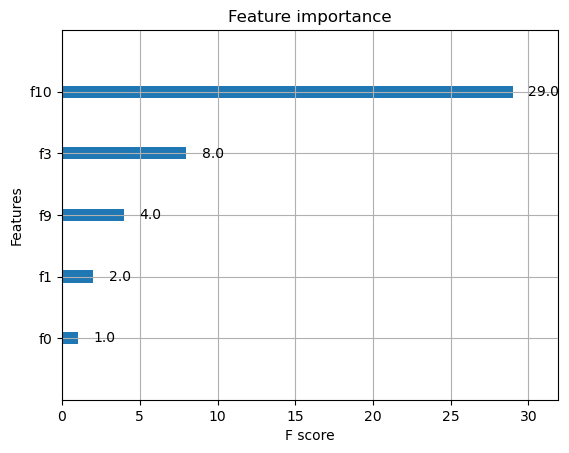

In [111]:
# Import matplot from matplotlib.pyplot
import matplotlib.pyplot as plt

# Plot feature importance
xgb.plot_importance(Xgb_clf)
plt.show()

### 2.2.6 Classification Decision Tree
##### 2.2.6.1 Performing Classification Decision Tree technique by using sklearn model on "y_train" and "x_train" varaibles 

In [112]:
# Import tree from sklearn model
from sklearn import tree

# Train tree for the classifier at max_depth=3
clftree = tree.DecisionTreeClassifier(max_depth = 3)

# Fit classifier tree with train datasets
clftree.fit(x_train_scaler, y_train)

DecisionTreeClassifier(max_depth=3)

In [113]:
# Import Image from IPython.display model
from IPython.display import Image  

# Import pydotplus
import pydotplus 

In [114]:
# export graphviz for tree with some defined parameters
dot_data = tree.export_graphviz(clftree, out_file=None, feature_names=x_train.columns, filled = True)

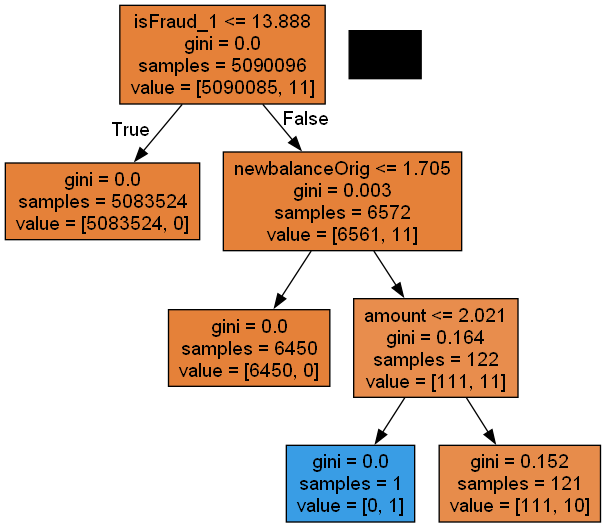

In [115]:
# Generate the graph from the dot data using pydotplus
clf_graph = pydotplus.graph_from_dot_data(dot_data)

# Display the graph as a PNG image using IPython's Image class
Image(clf_graph.create_png())

In [116]:
# Predict the target variable for the train and test dataset for classification dicison tree
clftree_y_train_pred = clftree.predict(x_train_scaler)
clftree_y_test_pred = clftree.predict(x_test_scaler)

##### 2.2.6.2 Performance evaluation for Classification Decision Tree
##### 2.2.6.2.1 Calculation of MSE for train and test dataset 

In [117]:
# Calculate mean squared error for training dataset of classification dicision tree
clftree_train_mse = mean_squared_error(y_train, clftree_y_train_pred)

# Print "MSE" of train dataset of classification dicision tree
print(clftree_train_mse) 

1.964599488889797e-06


In [118]:
# Calculate mean squared error for testing dataset of classification dicision tree
clftree_test_mse = mean_squared_error(y_test, clftree_y_test_pred)

# Print "MSE" of test dataset of classification dicision tree
print(clftree_test_mse) 

3.1433591822236754e-06


##### 2.2.6.2.2 Calculation of MAE for train and test dataset 

In [119]:
# Calculate mean absolute error for training dataset of classification dicision tree
clftree_train_mae = mean_absolute_error(y_train, clftree_y_train_pred)

# Print "MAE" of train dataset of classification dicision tree
print(clftree_train_mae)

1.964599488889797e-06


In [120]:
# Calculate mean absolute error for testing dataset of classification dicision tree
clftree_test_mae = mean_absolute_error(y_test, clftree_y_test_pred)

# Print "MAE" of test dataset of classification dicision tree
print(clftree_test_mae)

3.1433591822236754e-06


##### 2.2.6.2.3 Calculation of confusion matrix for train and test dataset 

In [121]:
# Confusion matrix calculation for train dataset of classification dicision tree
clftree_train_conf_mat = confusion_matrix(y_train, clftree_y_train_pred)

# Print confusion matrix of train dataset of classification dicision tree
print(clftree_train_conf_mat)

[[5090085       0]
 [     10       1]]


In [122]:
# Confusion matrix calculation for test dataset of classification dicision tree
clftree_test_conf_mat = confusion_matrix(y_test, clftree_y_test_pred)

# Print confusion matrix of test dataset of classification dicision tree
print(clftree_test_conf_mat)

[[1272519       0]
 [      4       1]]


##### 2.2.6.2.4 Calculation of accuracy score for train and test dataset 

In [123]:
# accuracy score calculation for the train dataset's for actual values (y_train) and predicted values (clftree_y_train_pred)
clftree_train_acc_score = accuracy_score(y_train, clftree_y_train_pred)

# Print accuracy score of train dataset of classification dicision tree
print(clftree_train_acc_score)

0.9999980354005111


In [124]:
# accuracy score calculation for the test dataset's for actual values (y_test) and predicted values (clftree_y_test_pred)
clftree_test_acc_score = accuracy_score(y_test, clftree_y_test_pred)

# Print accuracy score of test dataset of classification dicision tree
print(clftree_test_acc_score)

0.9999968566408177


##### 2.2.6.2.5 Checking for overfitting and underfitting 

In [125]:
# Check for overfitting
if clftree_train_acc_score > clftree_test_acc_score + 0.15:  # Example threshold for overfitting
    print("The 'Classification Decision Tree' trained model is overfitting.")
elif clftree_train_acc_score < clftree_test_acc_score - 0.15:  # Example threshold for underfitting
    print("The 'Classification Decision Tree' trained model is underfitting.")
else:
    print("The 'Classification Decision Tree' trained model is Well-fitted.")

The 'Classification Decision Tree' trained model is Well-fitted.


### Comparision of machine learning models used to train model for predicting salary

In [126]:
# Function to determine fitting status
def determine_fitting_status(train_r2, test_r2, threshold=0.15):
    if train_r2 > test_r2 + threshold:
        return "Overfitting"
    elif train_r2 < test_r2 - threshold:
        return "Underfitting"
    else:
        return "Well-fitted"

# Data for the table
data = {
    "Model": ["Logistic Regression", "Linear Discriminant Analysis","Bagging", "Random Forest", "Gradient Boosting",
              "Ada boost", "XG Boost", "Classification Decision Tree"],
    
    "MSE_of_training": [LR_train_mse, LDA_train_mse, Bagging_train_mse, RF_train_mse, GB_train_mse, Ada_train_mse, 
                        Xgb_train_mse, clftree_train_mse],
    
    "MSE_of_testing": [LR_test_mse, LDA_test_mse, Bagging_test_mse, RF_test_mse, GB_test_mse, Ada_test_mse, 
                       Xgb_test_mse, clftree_test_mse],
    
    "MAE_of_training": [LR_train_mae, LDA_train_mae, Bagging_train_mae, RF_train_mae, GB_train_mae, Ada_train_mae, 
                        Xgb_train_mae, clftree_train_mae],
    
    "MAE_of_testing": [LR_test_mae, LDA_test_mae, Bagging_test_mae, RF_test_mae, GB_test_mae, Ada_test_mae, 
                       Xgb_test_mae, clftree_test_mse],
    
    "accuracy_score_training": [LR_train_acc_score, LDA_train_acc_score, Bagging_train_acc_score, RF_train_acc_score, 
                                GB_train_acc_score, Ada_train_acc_score, Xgb_train_acc_score, clftree_train_acc_score],
    
    "accuracy_score_testing": [LR_test_acc_score, LDA_test_acc_score, Bagging_test_acc_score, RF_test_acc_score, 
                               GB_test_acc_score, Ada_test_acc_score, Xgb_test_acc_score, clftree_test_acc_score]}

# Calculate accuracy_score differences
data["accuracy_score_difference"] = [abs(train-test) for train, test in zip(data["accuracy_score_training"],
                                                                            data["accuracy_score_testing"])]

# Determine fitting status for each model
fitting_status = [determine_fitting_status(train_r2, test_r2) for train_r2, test_r2 in zip(data["accuracy_score_training"], 
                                                                                           data["accuracy_score_testing"])]

# Add fitting status to data
data["Fitting_Status"] = fitting_status

df = pd.DataFrame(data)  # Create DataFrame
print(df) # Display the table

                          Model  MSE_of_training  MSE_of_testing  \
0           Logistic Regression         0.000002        0.000004   
1  Linear Discriminant Analysis         0.001289        0.001286   
2                       Bagging         0.000002        0.000003   
3                 Random Forest         0.000002        0.000004   
4             Gradient Boosting         0.000022        0.000024   
5                     Ada boost         0.000002        0.000004   
6                      XG Boost         0.000002        0.000004   
7  Classification Decision Tree         0.000002        0.000003   

   MAE_of_training  MAE_of_testing  accuracy_score_training  \
0         0.000002        0.000004                 0.999998   
1         0.001289        0.001286                 0.998711   
2         0.000002        0.000003                 0.999998   
3         0.000002        0.000004                 0.999998   
4         0.000022        0.000024                 0.999978   
5        

## Which model’s performance is best and what could be the possible reason for that?

In [127]:
# Find the row with the minimum accuracy score difference
min_r2_diff_index = df["accuracy_score_difference"].idxmin()
min_r2_diff_row = df.loc[min_r2_diff_index]

# Display the entire row with minimum accuracy score difference
print(min_r2_diff_row)

Model                            Bagging
MSE_of_training                 0.000002
MSE_of_testing                  0.000003
MAE_of_training                 0.000002
MAE_of_testing                  0.000003
accuracy_score_training         0.999998
accuracy_score_testing          0.999997
accuracy_score_difference       0.000001
Fitting_Status               Well-fitted
Name: 2, dtype: object


After evaluating eight possible classification models, the **Bagging** showed the best performance as its accuracy score difference value is less in compare to other seven possible classification models.

- A Bagging Classifier, short for Bootstrap Aggregating Classifier, is an ensemble learning method designed to improve the stability and accuracy of machine learning algorithms. It is particularly useful for reducing variance and avoiding overfitting.

**Key Advantages**
- **Reduction in Variance:** By averaging the predictions of multiple models, bagging reduces the model's variance, leading to more robust and reliable predictions.
- **Improved Accuracy:** The ensemble of models often performs better than any individual model due to the aggregation of multiple perspectives.
- **Resilience to Overfitting:** Especially effective with high-variance models like decision trees, bagging helps prevent overfitting by smoothing out the model's predictions.

### Q5. What are the key factors that predict fraudulent customer?
Key factors that predict fraudulent transactions often include the **transaction amount**, with unusually high or low amounts being indicative of potential fraud. **Changes in account balances** before and after transactions are also critical, as **sudden or unexpected balance changes** can signal fraudulent activity. The **type of transaction**, such as cash out or transfer, might be more susceptible to fraud compared to regular payments.

### Q6. Do these factors make sense? If yes, How? If not, How not?
- **Transaction Amount:** Fraudulent transactions often involve amounts that deviate significantly from normal patterns, either being unusually high or unusually low.

- **Balance Changes:** Large and unexpected changes in account balances, both for the origin and destination accounts, can indicate fraudulent activity. For example, an account balance dropping to zero or close to zero right after a transaction is suspicious.

- **Transaction Type:** Certain types of transactions are more prone to fraud. For example, cash-out and transfer transactions are more likely to be fraudulent compared to regular payments, as they can immediately remove money from the account.

- **Frequency of Transactions:** A high frequency of transactions within a short period can indicate fraud, as fraudsters often try to move money quickly before being detected.

### Q7. What kind of prevention should be adopted while company update its infrastructure?
To effectively prevent and manage fraudulent transactions, companies should implement a multifaceted approach that combines technology, processes, and humans:

**1) Advanced Fraud Detection Systems:**
- **Machine Learning Models:** Utilize machine learning algorithms to detect unusual patterns in transaction data that may indicate fraud.
- **Real-time Monitoring:** Implement systems for real-time transaction monitoring to quickly identify and flag suspicious activities.

**2) Multi-Factor Authentication (MFA):**
- **Authentication Layers:** Require multiple forms of verification (password, biometric scan, SMS code) for transaction approval to enhance security.

**3) Behavioral Analytics:**
- **User Behavior Profiling:** Monitor and analyze user behavior with the transactaction history to establish baseline patterns, making it easier to detect fraudulent activity.

**4) Transaction Limits:**
- **Limits on Transactions:** Set thresholds for transaction amounts and frequencies to limit potential fraud exposure.

**5) Strong Encryption:**
- **Data Encryption:** Ensure that sensitive data is encrypted both at rest and in transit to protect it from unauthorized access.

**6) Regular Audits:**
- **Internal Audits:** Conduct regular internal audits to identify and address potential vulnerabilities and ensure adherence to security protocols.

**7) Employee Training and Awareness:**
- **Fraud Awareness Programs:** Train employees on recognizing and responding to potential fraud attempts and maintaining vigilance.
- **Incident Reporting:** Establish clear procedures for reporting suspicious activities internally.

**8) Customer Education:**
- **Awareness Campaigns:** Educate customers about common fraud schemes and encourage them to report any suspicious activities immediately.
- **Secure Practices:** Advise customers on best practices for securing their accounts, such as using strong-complex passwords.

**9) Collaboration with Financial Institutions:**
- **Information Sharing:** Collaborate with banks, financial institutions, and regulatory bodies to share information about emerging fraud trends and tactics.

By integrating these strategies, companies can create a robust defense against fraudulent transactions, protecting their assets and maintaining customer trust.

### Q8. Assuming these actions have been implemented, how would you determine if they work?
I used machine learning to train a model for detecting fraudulent transactions (isflaggedfraud). 
If the models I have trained are implemented in an advanced fraud detection system, the process will work as follows: 
- For every suspicious transaction detected after Multi-Factor Authentication in real-time, a popup notification will flag it on the customer's screen as a fraudulent transaction. 
- The system will inform banks and financial institutions with which we have collaborations, so they can take appropriate action. 
- As part of employee training and awareness, the system will inform the customer service team to connect with customers, warning them about the fraudulent transactions that might have occurred in the past. 

By implementing these processes, we aim to handle fraud detection and response in real-time.

In [128]:
# End time
end_time = time.time()

# Calculate and print execution time
execution_time = end_time - start_time
print(f"Execution time: {execution_time} seconds")  # ptint execution time in second

Execution time: 2078.7129650115967 seconds


### Check for the execustion time for this notebook in bottom of the page
#### 2078.7129650115967 seconds approx